<a href="https://colab.research.google.com/github/Cinnameldehyde/Major-work/blob/main/Major_GANtrial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import data from kaggle and load


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ardamavi/27-class-sign-language-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the '27-class-sign-language-dataset' dataset.
Path to dataset files: /kaggle/input/27-class-sign-language-dataset


In [3]:
# Base path to dataset (adjust for Colab / Kaggle)
base_path = "/kaggle/input/27-class-sign-language-dataset"

import numpy as np

# Load x.npy and y.npy
X = np.load(f'{base_path}/X.npy')  # shape: (Samples, H, W, C)
y = np.load(f'{base_path}/Y.npy')  # shape: (Samples, 1), string labels

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Sample labels:", y[:5])


X shape: (22801, 128, 128, 3)
y shape: (22801, 1)
Sample labels: [['please']
 ['please']
 ['please']
 ['please']
 ['please']]


# Visualising

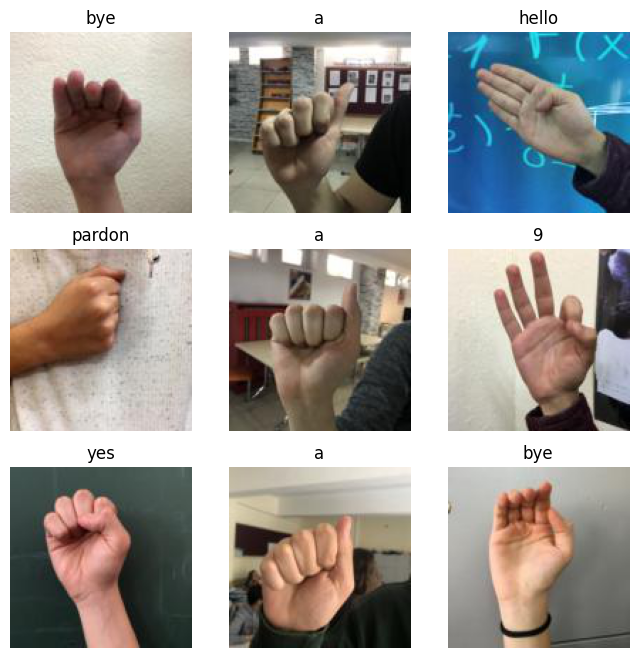

In [6]:
import matplotlib.pyplot as plt
import random

def show_random_images(X, y, num_images=9):
    plt.figure(figsize=(8,8))
    indices = random.sample(range(len(X)), num_images)
    for i, idx in enumerate(indices):
        img = X[idx]  # H, W, C
        label = y[idx][0]  # string label
        plt.subplot(3,3,i+1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    plt.show()

# Show random images
show_random_images(X, y)


preprocess using torch

In [9]:
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

# Flatten y if necessary
y_flat = y.flatten()

# Create dictionary: index -> label
label_dict = {}
for number, label in enumerate(np.unique(y_flat)):
    label_dict[number] = str(label)  # convert np.str_ to standard Python str

print("Unique labels dictionary:", label_dict)
print("X shape:", X.shape)

Unique labels dictionary: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'NULL', 11: 'a', 12: 'b', 13: 'bye', 14: 'c', 15: 'd', 16: 'e', 17: 'good', 18: 'good morning', 19: 'hello', 20: 'little bit', 21: 'no', 22: 'pardon', 23: 'please', 24: 'project', 25: 'whats up', 26: 'yes'}
X shape: (22801, 128, 128, 3)


In [ ]:
# Mapping: label string -> integer
label_to_idx = {v:k for k,v in label_dict.items()}

# Convert y to integer indices
y_idx = np.array([label_to_idx[str(lbl[0])] for lbl in y])

# Convert X and y to torch tensors
X_tensor = torch.tensor(X, dtype=torch.float32).permute(0,3,1,2)  # N, C, H, W
y_tensor = torch.tensor(y_idx, dtype=torch.long)

# Create TensorDataset
dataset = TensorDataset(X_tensor, y_tensor)

# Train/test split (80/20)
from torch.utils.data import random_split
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print("Number of classes:", len(label_dict))
print("Training samples:", len(train_dataset))
print("Testing samples:", len(test_dataset))
